# **Stock Price Prediction And Forecasting Using Stacked LSTM**

In [1]:
# importing necessary libraries
import pandas_datareader as pdr
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
apiKey = "af8f7eed31bd1e218005cf4bfa8874cdf3e0bda9"

In [3]:
# # getting google data upto this date
# df = pdr.get_data_tiingo('AAPL', api_key = apiKey)
# df.head()

In [4]:
# # saving the data to csv file for future processing
# df.to_csv("Datasets/appleData.csv")

In [5]:
# reading the saved dataset
df = pd.read_csv("Datasets/appleData.csv")

In [6]:
# displaying first two records
df.head(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-12 00:00:00+00:00,171.70,172.39,171.461,172.15,18945457,40.815488,40.979511,40.758674,40.922459,75781828,0.0,1.0
1,AAPL,2017-12-13 00:00:00+00:00,172.27,173.54,172.000,172.50,23142242,40.950985,41.252882,40.886802,41.005659,92568968,0.0,1.0


In [7]:
# displaying last two records
df.tail(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1256,AAPL,2022-12-08 00:00:00+00:00,142.65,143.52,141.1,142.36,62128338,142.65,143.52,141.1,142.36,62128338,0.0,1.0
1257,AAPL,2022-12-09 00:00:00+00:00,142.16,145.57,140.9,142.34,76097011,142.16,145.57,140.9,142.34,76097011,0.0,1.0


In [8]:
# Selecting "adjClose" feature
X = df.reset_index()["close"]

In [9]:
X

0       171.70
1       172.27
2       172.22
3       173.97
4       176.42
         ...  
1253    146.63
1254    142.91
1255    140.94
1256    142.65
1257    142.16
Name: close, Length: 1258, dtype: float64

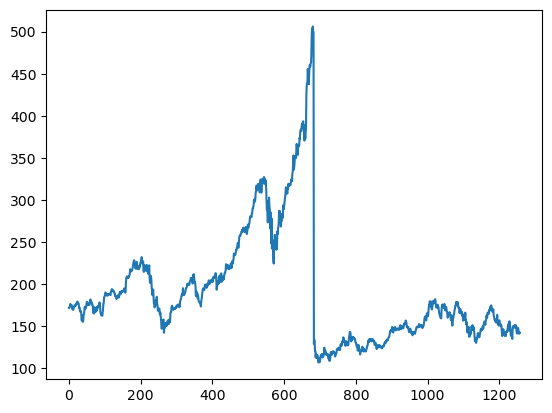

In [10]:
plt.plot(X)

In [11]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# defining scaler object
scaler = MinMaxScaler(feature_range = (0, 1))

In [12]:
# applying scalling
X = scaler.fit_transform(np.array(X).reshape(-1, 1))

In [13]:
# shape of the splitted data
dShape = X.shape[0]
dShape

1258

In [14]:
# specifying the sizes in percentages
trainSize = int(dShape*0.7)
validationSize = int(dShape*0.3)

In [15]:
# displaying the sizes
trainSize, validationSize

(880, 377)

In [16]:
Xtrian = X[:trainSize]
Xval = X[trainSize:trainSize+validationSize]

In [17]:
# displaying training, validation
Xtrian, Xval

(array([[1.62454602e-01],
        [1.63882279e-01],
        [1.63757044e-01],
        [1.68140263e-01],
        [1.74276769e-01],
        [1.69567940e-01],
        [1.69092048e-01],
        [1.70745147e-01],
        [1.70745147e-01],
        [1.59624296e-01],
        [1.59699436e-01],
        [1.60901691e-01],
        [1.56268003e-01],
        [1.63857232e-01],
        [1.63782091e-01],
        [1.65785848e-01],
        [1.70720100e-01],
        [1.69092048e-01],
        [1.69041954e-01],
        [1.68941766e-01],
        [1.71421415e-01],
        [1.75954915e-01],
        [1.73700689e-01],
        [1.80989355e-01],
        [1.81390106e-01],
        [1.79386349e-01],
        [1.75729493e-01],
        [1.75829681e-01],
        [1.68766437e-01],
        [1.60976832e-01],
        [1.61978710e-01],
        [1.53087038e-01],
        [1.50607389e-01],
        [1.51759549e-01],
        [1.52636193e-01],
        [1.34402004e-01],
        [1.24358172e-01],
        [1.40738885e-01],
        [1.3

In [18]:
def dataSetCreater(dataset, timeStamp):
    X = [] # Feature matrix
    y = [] # target variable
    for i in range(len(dataset)-timeStamp):
        a = dataset[i:i+timeStamp]
        X.append(a)
        y.append(dataset[i+timeStamp])
        
    return np.array(X), np.array(y)

In [19]:
# Splitting the data into training, testing, and validation
X_train, y_train = dataSetCreater(Xtrian, timeStamp=150)
X_val, y_val = dataSetCreater(Xval, timeStamp=150)

In [20]:
X_train.shape, y_train.shape

((730, 150, 1), (730, 1))

In [21]:
X_val.shape, y_val.shape

((227, 150, 1), (227, 1))

In [22]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(100,input_shape = (150, 1),return_sequences=True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.summary()

2022-12-20 23:36:30.009172: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 23:36:30.014474: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 150, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 151,451
Trainable params: 151,451
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = "mae", optimizer = "adam")

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 16s 863ms/step - loss: 0.1116 - val_loss: 0.0274
Epoch 2/100
12/12 [==============================] - 8s 631ms/step - loss: 0.0423 - val_loss: 0.0265
Epoch 3/100
12/12 [==============================] - 8s 623ms/step - loss: 0.0331 - val_loss: 0.0174
Epoch 4/100
12/12 [==============================] - 7s 613ms/step - loss: 0.0292 - val_loss: 0.0164
Epoch 5/100
12/12 [==============================] - 8s 637ms/step - loss: 0.0309 - val_loss: 0.0153
Epoch 6/100
12/12 [==============================] - 8s 651ms/step - loss: 0.0325 - val_loss: 0.0183
Epoch 7/100
12/12 [==============================] - 8s 629ms/step - loss: 0.0292 - val_loss: 0.0194
Epoch 8/100
12/12 [==============================] - 7s 621ms/step - loss: 0.0293 - val_loss: 0.0160
Epoch 9/100
12/12 [==============================] - 8s 628ms/step - loss: 0.0248 - val_loss: 0.0151
Epoch 10/100
12/12 [==============================] - 8s 637ms/step - loss: 0.0239 - val_l

## **Evaluation**

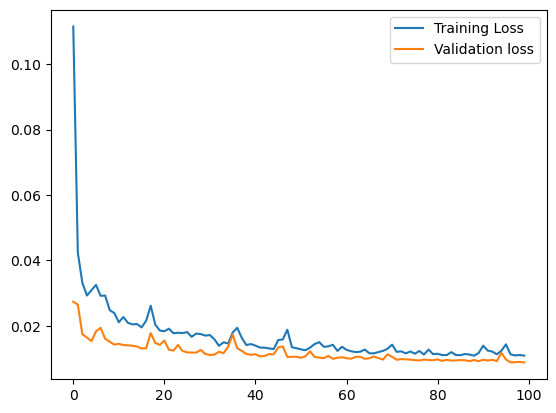

In [38]:
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [33]:
model.save("TSFmodel")

INFO:tensorflow:Assets written to: TSFmodel/assets


INFO:tensorflow:Assets written to: TSFmodel/assets


In [56]:
from tensorflow.keras.models import load_model
model = load_model("TSFmodel")

In [57]:
# making prediction on validation set
y_valPred = model.predict(X_val)
y_trainPred = model.predict(X_train)

In [58]:
# Transform back to original form
y_valPred = scaler.inverse_transform(y_valPred)
y_trainPred = scaler.inverse_transform(y_trainPred)

In [59]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train, y_trainPred)))
print(math.sqrt(mean_squared_error(y_val, y_valPred)))

226.51518117444164
155.03922568461303


In [61]:
len(y_trainPred)

730

### **Plotting Original set, Training and Validation set predictions**

In [62]:
# time stamp 
# first prediction starts after this time stamp
stamp = 150

**Preparing for Ploting prediction on training set**

In [32]:
# Original array shape
print(f"Original array shape: {X.shape}")
trainingPredPlot = np.empty_like(X)
trainingPredPlot[:] = np.nan

# Shipting the training prediction 150 time stamp and assigning training prediction values to this phase
trainingPredPlot[stamp:len(y_trainPred)+stamp] = y_trainPred

# empty array shape
print(f"Empty array shape: {trainingPredPlot.shape}")

Original array shape: (1258, 1)
Empty array shape: (1258, 1)


In [33]:
# shape of the training prediction set
print(len(y_trainPred))

# Time stamp, Training set length, Time Stamp, validation set length + 1
150+730+150+227+1

730


1258

**Preparing for Ploting prediction on training set**

In [34]:
testingPredPlot = np.empty_like(X)
testingPredPlot[:] = np.nan
testingPredPlot[len(y_trainPred)+(stamp*2)+1:] = y_valPred

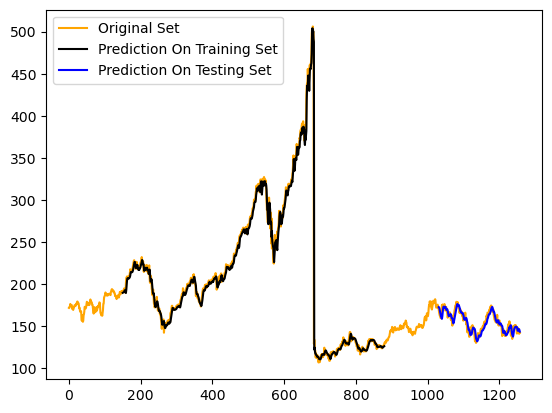

In [35]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X), label = "Original Set", color = "orange")
plt.plot(trainingPredPlot, label = "Prediction On Training Set", color = "black")
plt.plot(testingPredPlot, label = "Prediction On Testing Set", color = "blue")
plt.legend()
plt.show()

In [36]:
# length of test set
len(Xval)

377

In [37]:
# As we have trained the model on 150 time stamp 
# so we will pass the last 150 values to the model to predict on
x_input = np.array(Xval[227:]).reshape(1, -1)
x_input.shape

(1, 150)

In [38]:
# converting it into list to pass it to the model for prediction
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.096806512210

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<60):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.04932833090424538], [0.04908200725913048], [0.0488385409116745], [0.04859791323542595], [0.048360053449869156], [0.048124972730875015], [0.04789261519908905], [0.04766296222805977], [0.047435980290174484], [0.047211647033691406], [0.046989914029836655], [0.04677077382802963], [0.04655417799949646], [0.04634011164307594], [0.04612854868173599], [0.045919451862573624], [0.045712802559137344], [0.045508552342653275], [0.04530670493841171], [0.045107219368219376], [0.044910065829753876], [0.04471520707011223], [0.044522643089294434], [0.04433233290910721], [0.04414425790309906], [0.0439583845436573], [0.043774690479040146], [0.0435931533575058], [0.04341375455260277], [0.04323644936084747], [0.04306124895811081], [0.042888093739748], [0.04271697998046875], [0.04254787787795067], [0.04238077998161316], [0.04221564903855324], [0.04205244779586792], [0.041891176253557205], [0.041731808334589005], [0.04157431796193123], [0.041418690234422684], [0.04126489534974098], [0.04111291840672493], 

In [52]:
len(lst_output)

60

In [53]:
day_new=np.arange(1,151)
day_pred=np.arange(151,211)

In [54]:
len(day_pred)

60

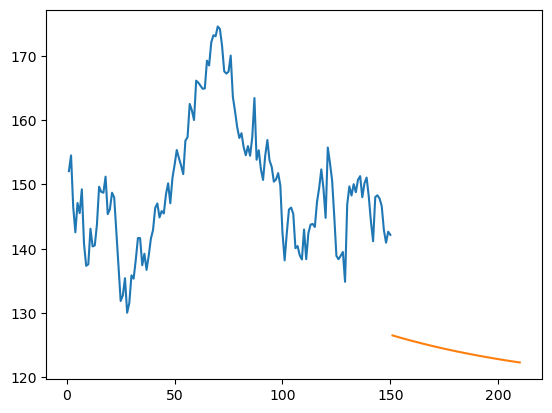

In [55]:
plt.plot(day_new, scaler.inverse_transform(X[1108:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

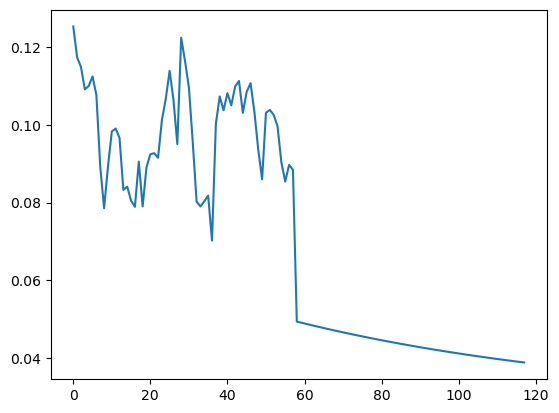

In [68]:
df_=X.tolist()
df_.extend(lst_output)
plt.plot(df_[1200:])

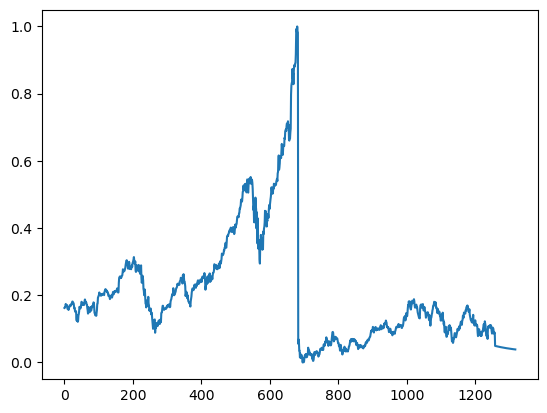

In [69]:
plt.plot(df_[:])